# Explainer Notebook for Harry Potter Network Analysis

This explainer notebook contains the code and detailed analysis about our work on Harry Potter network.   
The webside for presenting our work is here(<font color=red>the link</font>).

<font color=red>Maybe some more general information here</font>
    

### 1. Motivation 
<!--
* What is your dataset?
* Why did you choose this/these particular dataset(s)?
* What was your goal for the end user's experience?
-->

#### Harry Potter Network Dataset

Our dataset is the characters from Harry Potter Novel, including character relationships, character attributes, characer stories.
We got the dataset using API from Fandom pages. Also, J.K rolling’s books will be used as our data source as well.    
<font color=orange>(not enough, we build this dataset by blabla, what source we use, how we get things done. 
simple discrption of the dataset , includeing: amount of nodes, edges, size of files.
the strength(big, contains lots of characters) ;  node attributes
some limitations: the potential problems of this dataset)</font>

#### Why we choose this dataset?

**First of all**, this dataset has a very complete structure of character relations, which is a perfct material for social network analysis.
**Moreover**, there are some particularly interesting studies of the relationship between universes, such as those between wizards and Muggles (non-wizards), from which we hope to derive the new X-degree of separation for whole universe.
**Also**, the division of the four major colleges systems within the Hogwarts also caught our attention, and we wanted to find the attributes and patterns so that everyone could know which house they were assigned to.
**Finally**, the Harry Potter novel accompanies almost everyone's childhood, most of people are very familiar with the characters and stories, hence, it will be easier to understand the outcomes of our exploration. And it would be exciting to explore new discoveries from familiar stories and relationships.

<font color=orange>需要更有逻辑，现在这个非常散，这个可以做完后面的再来写</font>


#### Our goal for end user's experience

**Through our project, we hope that users will be able to:**

View the social network structure of the characters.
Get the basic statistics of the social network, such as how many characters involved (nodes), how many relationships they have (links) and so on.
Understand the social network node attributes and corresponding social network structures (For instance: Four colleges; Muggle world& Wizarding World, Dark magic& Good Wizard).
Follow the community detection of the social network (four colleges in Hogwarts) and be able to see how the generated community detections differs from the original allocation result.
Know the keywords for each community.
From clustering the sentiment detection/analysis of the characters, understand the general emotional tone of the characters in the book.


**As for the rendering part of the web page (more technical), we hope that we could:**

Implement partitioning of content
Interactive the visualization of social networks(for instance, zoom in and zoom out,etc)
Implement machine learning and data interaction: Predicting which college the character belongs to
Implement data interaction: give a character and the 10 most relevant characters; Or give the soical network associated with the character

<font color=orange>这块是我之前列大纲的时候写的，如果写在这里需要展开+流畅，小点读不太通，没有前因后果</font>


In [1]:
import json
import networkx as nx
from nltk.tokenize import word_tokenize
import nltk
from tqdm import tqdm
import os
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 2. Basic stats
<!--
* Write about your choices in data cleaning and preprocessing
* Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)
-->

<这一块nina整理>

#### 2.1 data cleaning and preprocessing

<font color=orange>这块还是需要注意 **解释**(*每一步: 为什么这么做，具体怎么做的，分析结果*)， 代码保留需要的即可，不要大段打印。</font>

<font color=tomato>(a) **cleaning the node.**  
    the ceritions; (清理原则123，顺便这里可以提一嘴是怎么收集数据的所以需要这样子的清理。)  
    the amount of nodes after cleaning.  
    (b) **cleaning the fandom page**
    掐头去尾+去掉html格式；   
    原因;    
    具体步骤；  
    得到的具体的东西（描述即可不需展示）   
    (c) **书籍的cleaning**
    为什么要这么做；  
    具体步骤；得到的具体的东西（描述即可不需展示）</font>
    
    
    
#### 2.2 basic statiatic of our dataset


<font color=tomato>   
node数量， edge数量，       
    degree分布（注意log-log图+ 分析） ；   
      \gama值；  
    （还有啥能做的不知道了需要再翻翻network science,反正就是能反应网络特性的一些东西）    
   然后记得加分析

</font>


### 3. Tools, theory and analysis. 
<!--
* Talk about how you've worked with text, including regular expressions, unicode, etc.
* Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
* How did you use the tools to understand your dataset?
-->

(写得再流畅一点，承上启下那种，逻辑再好点，现在瞎写的)
The questions that we interested about this dataset is：
1. 麻瓜世界与魔法世界的联系。
哈利波特的故事里除了无比强大的巫师们，还有不懂魔法的麻瓜们。对于大多数麻瓜们来说，他们是不知道有魔法世界的存在的，但是麻瓜和魔法世界又有着不可分割的关系。我们想知道：麻瓜世界和魔法世界的是如何连接的？是否有一些关键的结点？两个世界的大小，属性如何？是否有类似于six degree of separation的定律存在于魔法、麻瓜世界 已经两个世界中？ 

2. 四个学院的特征属性。
霍格沃兹有四个学院，在新生入学时，分院帽会将新生分到四个学院中的一个。根据JK罗琳对魔法世界的设定，分院帽会按照学生的特质进行分院——也就是说，每个学院应有自己特有的一些特征。比如，广泛认为，格兰芬多热情勇敢果决。我们想知道通过对fandom页面的文本分析+书的文本分析，来提取每个学院的关键词，得到其属性。

3. 哈利波特世界中人物的情感分析。
作为一个儿童读物，哈利波特中的人物具有鲜明的性格特点和感情倾向，我们很好奇，哪些人物更积极、开心；而哪些人物更加的阴郁、低落？同时我们也相对四个学院的社区进行这样的检测。

4. 利用文本信息的社区检测。
在社区检测方法中，权重值一直被我们所忽略。事实上，在人物A和B，C均认识的情况下，他们之间的关系紧密的强弱并不相同。我们利用文本信息，设计两个节点之间边的权重，再进行社区检测算法。我们将此算法应用在霍格沃兹学院内，讲通过算法产生的分隔与分院帽的结果进行对比，分析之间的不同并探索how smart the sorting hat is.

5. 预测分院结果。
输入一段文字描述，你将会被分到哪一个学院呢？我们希望可以将之前在网络中学习到知识与ML相结合，让哈迷们体验一下自己与哪个学院的特质更相近。

#### 3.1 The connection between magic universe and muggle universe

(解释这个问题，问题的有趣性，我们想要探索的内容blabla)  

(子网络的大小属性)

(子网络的连接关系，有无关键节点，是什么，分析)

(six degree of separation定律的验证和分析)

注意分析解释，想想对面是一个不知道哈利波特的人！

#### 3.2  The most representative words for each house in Hogwarts

问题描述。  

如何获取学院属性。  子网络大小。   

文本分析的具体步骤。

结果分析。与JK罗琳的设定进行对比。


#### 3.2.1 The Interesting Question
【文本: 介绍问题的背景（不需要限于下方文字片段可以展开），为什么这个问题有趣】  
*可参考*：四个学院的特征属性。 霍格沃兹有四个学院，在新生入学时，分院帽会将新生分到四个学院中的一个。根据JK罗琳对魔法世界的设定，分院帽会按照学生的特质进行分院——也就是说，每个学院应有自己特有的一些特征。比如，广泛认为，格兰芬多热情勇敢果决。我们想知道通过对fandom页面的文本分析+书的文本分析，来提取每个学院的关键词，得到其属性。

#### 3.2.2 Get the Hogwarts subnetwork from Fandom  
【文本部分：
Fandom上有霍格沃兹学院的catogory  根据此我们可以构建hogwarts学院的dict 并抽取子网络
】  

【代码可无：】

#### 3.2.3 Extract the representative words for each house

【文本：
如何进行这一步？ 我们采取了以下几个方法：
1. 使用TF-TR
TF-idf不太适合我们的case 因为idf项几乎不起作用 由于hp学院学员之间复杂的故事，很多词汇在每个学院中 都有出现
2. 修改TF term  
增大TRterm的比重->减小tf的影响
3. 去掉列表人名
（描述 原因 效果）
4. 只选取形容词 名词

】

【代码部分】

In [29]:
# import the library for this part
import json
from tqdm import tqdm
import os
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Firstly, we get the data for character list for each house in Hogwarts. The json file we read here is previously generated from the Famdom category page: [Individuals_by_house]( https://harrypotter.fandom.com/wiki/Category:Individuals_by_house). Notice that we need to replace the blank with underscore here, as the text file from each Fandom page is named with underscore.

In [30]:
#load the json file
# the json file in generated from the catagory in Famdom: https://harrypotter.fandom.com/wiki/Category:Individuals_by_house
parent_folder = './data/' # '/Users/zhengqing/desktop/'
four_houses = parent_folder +'hogwarts_house.json'
with open(four_houses,'r') as f:
    four_houses_dict = json.load(f)

# get the list fro each house
for key in four_houses_dict.keys():    
    new_items = []
    for a in four_houses_dict[key]:
        new_item = a.replace(" ", "_")
        new_items.append(new_item)
    four_houses_dict[key] = new_items

Then we get the list for all character in Harry Potter Network. We want to remove these names in the following text analysis, as the names to not contribute to the personality analysis of each house. Names are splited so both the first name and the last name will be collected in this list. 

In [31]:
# get a list of character name for later removing
four_houses = parent_folder +'nodes_egdes_new.json'
with open(four_houses,'r') as f:
    node_edges = json.load(f)

character_names_set = []
for node in node_edges.keys(): 
    character_names_set.extend(node.lower().split('_'))
character_names_set.extend(['ginny']) # some nicknames of the characters
character_names_set = set(character_names_set)
print('The number of character names should be removed:{}'.format(len(character_names_set)))

The number of character names should be removed:4541


After that, we define a function to generate the word list from raw text. The following steps are took:  
1. tokenize from the string text and get the raw word list
2. lower all the words.
3. filter the words with part of speech. Here, as we care about the personality analysis for students in each house, we only collect the adjectives.
4. remove all the stopwords in English.
5. remove all the names in Harry Potter character list.

In [32]:
# define the funtion to generate the raw word text(with punctuation marks) from a raw_text
from nltk.corpus import stopwords
from nltk import pos_tag
stop_words = set(stopwords.words('english'))

def get_word_list(raw_text):
    token = word_tokenize(raw_text)
    tokenize_nopunc= [w for w in token if w.isalpha()]
    tokenize_nopunc_lower = [w.lower() for w in tokenize_nopunc]
    tokenize_nopunc_lower = [w for (w,pos) in pos_tag(tokenize_nopunc_lower) if pos == 'JJ']
    tokenize_nopunc_lower_nostop = [w for w in tokenize_nopunc_lower if  w not in stop_words]
    # remove the character name 
    tokenize_nopunc_lower_nostop = [w for w in tokenize_nopunc_lower if w not in character_names_set]
    return tokenize_nopunc_lower_nostop

Now get the TF list for each house. (具体步骤，公式)

In [33]:
data_folder = parent_folder + '/cha_fandom_page_text/'
tf_lists_all = {}
#get the tf list for each community

for community in four_houses_dict:
    word_bank = [] 
    # get the nodes in each community
    node_list = four_houses_dict[community]
    # word_bank: tore all word (have already removed punctuation, lowered the words, and done the stemming)
    for node_name in node_list:       
        file_path = os.path.join(data_folder,node_name+'.txt') 
    #check if the file exist, if not, just skip and continue
        try:
            with open(file_path,'r',encoding='utf-8') as f:
                raw_text = f.read()               
            processed_words = get_word_list(raw_text)
            word_bank.extend(processed_words)
            #remove the unnecessary/unimportant word
#             token_lst = [word for word in word_bank if word not in remove]
        except:
#             print(node_name)
            pass
    print('the number of words in community{}:{}'.format(community,len(word_bank)))
    tf_raw = nltk.FreqDist(word_bank)
    tf_lists_all[community] = tf_raw


# store the tf_infor into json
# json_path = '/Users/zhengqing/desktop/hp/four_houses.json'
json_path = parent_folder+'/houses_tf_list.json'
with open(json_path,'w') as f:
    json.dump(tf_lists_all, f)

the number of words in communityGryffindors:22863
the number of words in communityHufflepuffs:5561
the number of words in communityRavenclaws:6178
the number of words in communitySlytherins:13614
the number of words in communityUnknown House:6274


Now, we get the TR list as well as the TF-TR list for each community.  
(具体步骤，TR公式，修改后的TR公式，为什么这么修改)

Here we modify the TR(Term Radio) Formula in Snue's lecture nodes in Week 7. Firstly, the TF is used for two universe in lecture notes, but here we have 5 classes. Therefore the TF is improved by the following Formula:
$$TF = \frac{TF_{self}}{TF_{others} + c}$$

where $TF_{others} = \sum_{i\neq self} TF_i $.

And the TF-TR is improved as follows:


$$TF-TR = (TF)^{0.5}\times(TR)$$

By the exponent 0.5, the influence by TF would be decreased. We take this step because we notice that for some words, though they have a lower TR but the TF is too high, which leads to a high TF-TR score. More importantly, we here more care about the difference between the house so we want to reduce TF's impact.

In [34]:
# get the tr_list for each house
c = 1
tf_tr_list = {}
for house in tf_lists_all.keys():
    tf_tr_list[house] = {}
    other_house_list = [h for h in tf_lists_all.keys() if h is not house]
    #print('self house:{}\tother houses:{}\n'.format(house,other_house_list))
    
    for word in tf_lists_all[house].keys():
        tf_self = tf_lists_all[house][word]
        tf_other = []
        for other_house_each in other_house_list:
            if word in tf_lists_all[other_house_each].keys():
                tf_other.append(tf_lists_all[other_house_each][word])
            else:
                tf_other.append(0)
        
        tf_other_mean = np.sum(tf_other)
        w = tf_self/(tf_other_mean + c)
        tf_tr_ = w*(tf_self**(1/2))
        #print('{}\t\t{}\t{}\t{}\t{}'.format(word,tf_self,tf_other_mean,w,tf_tr_))
        tf_tr_list[house][word] = tf_tr_


In [35]:
for community in tf_tr_list:
    tf_tr = tf_tr_list[community]
    tf_tr_sorted = sorted(tf_tr.items(), key=lambda kv: kv[1],reverse=True)
    print('In community {}, the top 10 terms according to TF-TR are:'.format(community))
    for i,each in enumerate(list(tf_tr_sorted)[:10]):
        print('({}){}:{:.2f}, '.format(i+1,each[0],each[1]),end='')
    print('\n')
#     print('In community {}, the top 10 terms according to TF-TR are:{}\n'.format(community,list(tf_tr_sorted)[:20]))

In community Gryffindors, the top 10 terms according to TF-TR are:
(1)overdue:82.82, (2)quality:27.44, (3)text:27.44, (4)irresponsible:22.63, (5)good:22.49, (6)other:21.36, (7)serious:20.30, (8)several:19.16, (9)ecstatic:18.52, (10)wormtail:18.52, 

In community Hufflepuffs, the top 10 terms according to TF-TR are:
(1)variable:22.63, (2)newt:22.09, (3)ernie:10.67, (4)religious:8.00, (5)macusa:8.00, (6)metamorphic:8.00, (7)flowering:5.20, (8)bibble:5.20, (9)forgetfulness:5.20, (10)spiky:5.20, 

In community Ravenclaws, the top 10 terms according to TF-TR are:
(1)verdimillious:18.52, (2)dirigible:14.70, (3)warwick:11.18, (4)fraudulent:8.00, (5)nanny:8.00, (6)leek:8.00, (7)lovely:5.59, (8)portree:5.59, (9)jewish:5.59, (10)honorary:5.59, 

In community Slytherins, the top 10 terms according to TF-TR are:
(1)tree:19.52, (2)respectable:17.46, (3)nazi:14.70, (4)bloodline:14.70, (5)melbourne:14.70, (6)sacred:11.68, (7)persian:11.31, (8)immortal:11.31, (9)vain:11.18, (10)thuggish:11.18, 

In co

【可以在这里分析一下结果，简单分析 另外这边打印我已经优化了但是不知道是不是还是太多】

#### 3.2.4 WordCloud and Discussion

【文本：简单介绍】

Then, we plan to visualize the reault with wordcloud. As the wordcloud only be able to analysis text instead of word dictionary with TF=TR,firstly we generate a fake text to represent the TF-TR result. The detailed steps are followed: (描述)

After that, we visualize the fake text by WordCould library.For each house, we use their color of each in color map. The results are showed below. 

【代码】

【文本： 分析wordcloud结果； 结合原书的设定，分析我们的结果。（书中blabla怎么定义，我们得到的结果是怎么样的，相似/不相似，可能原因）】

In [48]:
#prepare for drawing
def tf_tr_to_string(tf_tr_dict):
    word_list = []
    for w in tf_tr_dict:
        tf_tr  = tf_tr_dict[w]
        times = int(round(tf_tr))
        word_list.extend([w]*times)
    string = ' '.join(word_list)
    return string

In [54]:
def draw_wordcloud(community_name,cm):
    tf_tr = tf_tr_list[community_name]
    commu_str = tf_tr_to_string(tf_tr)

    wordcloud = WordCloud(
        max_words= 200,
        background_color = 'white',
                          width=800,
                          height=600,
                          collocations=False,
                          colormap= cm
                         ).generate(commu_str)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('world could for community {}'.format(community_name))
    plt.show()

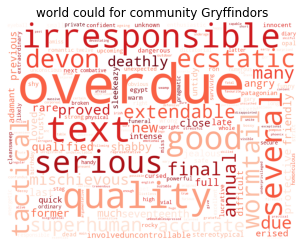

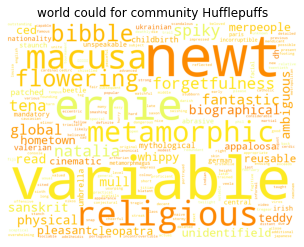

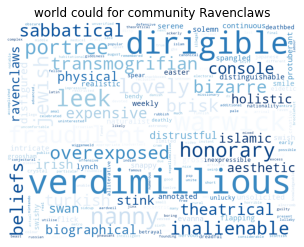

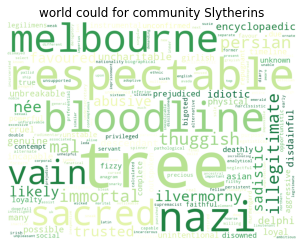

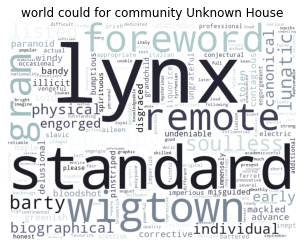

In [55]:
colormap = [ 'Reds','Wistia','Blues','YlGn','bone']
for i,community in enumerate(tf_tr_list):
    draw_wordcloud(community,colormap[i])

#### 3.3 Sentiment anslysis for characters/houses in Harry Potter network

问题描述。

具体步骤。

结果分析。

对学院的情感分析，分析结果。

#### 3.4 Community detection using text informaion

问题描述。（为什么要这么做要讲清楚）

具体步骤：  
提取文本向量： 具体怎么做的；
相似度：公式；
生成权重；
社区检测（具体算法以及算法如何运行的）

结果分析。与分院帽结果对比。分析分析分析。

#### 3.5 Prediction your house with description test

问题描述。（为什么研究这个 有什么意义）

具体步骤。

结果分析。

### 4. Discussion
<!--
* What went well?,
* What is still missing? What could be improved?, Why?
-->

#### 4.1 Summary on our result

其实我不知道这边还能讲啥。一般discussion可能会说一些延伸的东西。



#### 4.2 Problems and possible improvement

潜在的问题以及可能的解决办法。未来的方向。